In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
pd.set_option('max_rows', 5)
pd.set_option('max_columns', 1000)

In [42]:
df = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/train.csv")
df_test = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/test.csv")

In [43]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [44]:
y = df["Severity"]
df = df.drop("Severity",axis =1)


In [45]:
y = pd.DataFrame(y)

In [46]:
df = df.drop("Accident_ID",axis = 1)
ID = df_test["Accident_ID"]
df_test = df_test.drop("Accident_ID",axis = 1)

In [47]:
df.shape

(10000, 10)

In [48]:
df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696


In [49]:
df_test.shape

(2500, 10)

In [50]:
# Removing outliers

from scipy import stats
import numpy as np
z= []
for i in df.columns:
    temp = np.abs(stats.zscore(df[i])) #This gives the z scores of the particular df
    z.append(temp)

# Z Scores that are above or below 3,-3 are considered to be outliers
# Z score kind of measures how many standard deviations is a point far of
to_del = {0} # rows to be deleted

for i in (z):
    for c,j in enumerate(i):
        if j >3:
            to_del.add(c)

In [51]:
to_del = list(to_del)

In [52]:
# This deletes the rows with outliers
#df = df.drop(to_del,axis = 0)
#y = y.drop(to_del,axis = 0)

In [53]:
y.shape

(10000, 1)

In [54]:
for i in df.columns:
    print(i)
    print(df[i].nunique())

Safety_Score
1175
Days_Since_Inspection
23
Total_Safety_Complaints
44
Control_Metric
952
Turbulence_In_gforces
1117
Cabin_Temperature
950
Accident_Type_Code
7
Max_Elevation
4191
Violations
6
Adverse_Weather_Metric
4258


In [55]:
df.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

In [56]:
#Feature Generation
feature = pd.DataFrame()
cat_col = ["Violations","Accident_Type_Code"] #categorical columns for which we want to create features
num_col = ["Safety_Score","Days_Since_Inspection","Total_Safety_Complaints","Control_Metric","Turbulence_In_gforces","Cabin_Temperature","Max_Elevation","Adverse_Weather_Metric"] #Numerical columns for which we want to create features for the categorical columns
aggs = ["mean","max","min","std"] #functions we want to apply for the columns

for cat in cat_col:
    for num in num_col:
        for fun in aggs:
            feature[f'feature_{cat}_{num}_{fun}'] = df.groupby(cat)[num].transform(fun)
feature_test = pd.DataFrame()
for cat in cat_col:
    for num in num_col:
        for fun in aggs:
            feature_test[f'feature_{cat}_{num}_{fun}'] = df_test.groupby(cat)[num].transform(fun)
# difference between diff columns
diff_feat_1 = pd.DataFrame()
for i in range(len(num_col)):
    for j in range(i+1,len(num_col)):
        diff_feat_1[f'feature_{num_col[i]}-{num_col[j]}'] = df[num_col[i]] - df[num_col[j]]
        diff_feat_1[f'feature_{num_col[i]}+{num_col[j]}'] = df[num_col[i]] + df[num_col[j]]
diff_feat_1_test = pd.DataFrame()
for i in range(len(num_col)):
    for j in range(i+1,len(num_col)):
        diff_feat_1_test[f'feature_{num_col[i]}-{num_col[j]}'] = df_test[num_col[i]] - df_test[num_col[j]]
        diff_feat_1_test[f'feature_{num_col[i]}+{num_col[j]}'] = df_test[num_col[i]] + df_test[num_col[j]]
        #diff_feat_1_test[f'feature_{num_col[i]}*{num_col[j]}'] = df_test[num_col[i]] * df_test[num_col[j]]
        #
#GBM with 500 trees lr = 0.1 scored 85.38 with all these features
# GBM with 10k trees lr = 0.01 scored 86.67 with all these features

In [57]:
# custom created features
custom_features = pd.DataFrame()
temp = df["Safety_Score"]<46
temp1 = df["Control_Metric"]<55
temp2 = df["Safety_Score"]>46
temp3 = df["Control_Metric"]>55
final = []
for i in range(len(temp)):
    if ((temp[i] and temp1[i])==True) or ((temp2[i] and temp3[i])==True):
        final.append(True)
    else:
        final.append(False)
c_feat_1 = final
temp = df["Accident_Type_Code"]==2
temp1 = df["Accident_Type_Code"]==5
temp4 = df["Accident_Type_Code"]==6
temp5 = df["Accident_Type_Code"]==4
c_feat_2 = []
c_feat_3 = []
for i in range(len(df["Accident_Type_Code"])):
    if (temp[i] or temp1[i]) == True:
        c_feat_2.append(True)
    else:
        c_feat_2.append(False)
    if (temp4[i] or temp5[i]) == True:
        c_feat_3.append(True)
    else:
        c_feat_3.append(False)
custom_features["c_feat_1"] = c_feat_1
custom_features["c_feat_2"] = c_feat_2
custom_features["c_feat_3"] =c_feat_3


custom_features_test = pd.DataFrame()
temp = df_test["Safety_Score"]<46
temp1 = df_test["Control_Metric"]<55
temp2 = df_test["Safety_Score"]>46
temp3 = df_test["Control_Metric"]>55
final = []
for i in range(len(temp)):
    if ((temp[i] and temp1[i])==True) or ((temp2[i] and temp3[i])==True):
        final.append(True)
    else:
        final.append(False)
c_feat_1 = final
temp = df_test["Accident_Type_Code"]==2
temp1 = df_test["Accident_Type_Code"]==5
temp4 = df_test["Accident_Type_Code"]==6
temp5 = df_test["Accident_Type_Code"]==4
c_feat_2 = []
c_feat_3 = []
for i in range(len(df_test["Accident_Type_Code"])):
    if (temp[i] or temp1[i]) == True:
        c_feat_2.append(True)
    else:
        c_feat_2.append(False)
    if (temp4[i] or temp5[i]) == True:
        c_feat_3.append(True)
    else:
        c_feat_3.append(False)
custom_features_test["c_feat_1"] = c_feat_1
custom_features_test["c_feat_2"] = c_feat_2
custom_features_test["c_feat_3"] =c_feat_3

In [58]:
# 2nd base Features
temp.shape

(2500,)

In [59]:
feat_1_only = pd.concat([feature,diff_feat_1],axis = 1)

In [60]:
feat_1_test_only = pd.concat([feature_test,diff_feat_1_test],axis = 1)

In [61]:
feat_df = pd.concat([df,feature,diff_feat_1],axis =1)
feat_test_df = pd.concat([df_test,feature_test,diff_feat_1_test],axis =1)

In [62]:
print(feat_df.shape)
feat_df = pd.concat([feat_df,y,custom_features],axis = 1)
feat_test_df = pd.concat([ID,feat_test_df,custom_features_test],axis = 1)
print(feat_df.shape)
feat_df.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/feature_1.csv",index = False)
feat_test_df.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/feature_1_test.csv",index = False)

(10000, 130)
(10000, 134)


In [63]:
print(feat_test_df.shape)

(2500, 134)


In [64]:
# CREATING BASE 2 FEATURES from base 1 and original features

In [65]:
df_feat_1 = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/feature_1.csv")
df_test_feat_1 = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/feature_1_test.csv")

In [66]:
df_feat_1.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,feature_Violations_Safety_Score_mean,feature_Violations_Safety_Score_max,feature_Violations_Safety_Score_min,feature_Violations_Safety_Score_std,feature_Violations_Days_Since_Inspection_mean,feature_Violations_Days_Since_Inspection_max,feature_Violations_Days_Since_Inspection_min,feature_Violations_Days_Since_Inspection_std,feature_Violations_Total_Safety_Complaints_mean,feature_Violations_Total_Safety_Complaints_max,feature_Violations_Total_Safety_Complaints_min,feature_Violations_Total_Safety_Complaints_std,feature_Violations_Control_Metric_mean,feature_Violations_Control_Metric_max,feature_Violations_Control_Metric_min,feature_Violations_Control_Metric_std,feature_Violations_Turbulence_In_gforces_mean,feature_Violations_Turbulence_In_gforces_max,feature_Violations_Turbulence_In_gforces_min,feature_Violations_Turbulence_In_gforces_std,feature_Violations_Cabin_Temperature_mean,feature_Violations_Cabin_Temperature_max,feature_Violations_Cabin_Temperature_min,feature_Violations_Cabin_Temperature_std,feature_Violations_Max_Elevation_mean,feature_Violations_Max_Elevation_max,feature_Violations_Max_Elevation_min,feature_Violations_Max_Elevation_std,feature_Violations_Adverse_Weather_Metric_mean,feature_Violations_Adverse_Weather_Metric_max,feature_Violations_Adverse_Weather_Metric_min,feature_Violations_Adverse_Weather_Metric_std,feature_Accident_Type_Code_Safety_Score_mean,feature_Accident_Type_Code_Safety_Score_max,feature_Accident_Type_Code_Safety_Score_min,feature_Accident_Type_Code_Safety_Score_std,feature_Accident_Type_Code_Days_Since_Inspection_mean,feature_Accident_Type_Code_Days_Since_Inspection_max,feature_Accident_Type_Code_Days_Since_Inspection_min,feature_Accident_Type_Code_Days_Since_Inspection_std,feature_Accident_Type_Code_Total_Safety_Complaints_mean,feature_Accident_Type_Code_Total_Safety_Complaints_max,feature_Accident_Type_Code_Total_Safety_Complaints_min,feature_Accident_Type_Code_Total_Safety_Complaints_std,feature_Accident_Type_Code_Control_Metric_mean,feature_Accident_Type_Code_Control_Metric_max,feature_Accident_Type_Code_Control_Metric_min,feature_Accident_Type_Code_Control_Metric_std,feature_Accident_Type_Code_Turbulence_In_gforces_mean,feature_Accident_Type_Code_Turbulence_In_gforces_max,feature_Accident_Type_Code_Turbulence_In_gforces_min,feature_Accident_Type_Code_Turbulence_In_gforces_std,feature_Accident_Type_Code_Cabin_Temperature_mean,feature_Accident_Type_Code_Cabin_Temperature_max,feature_Accident_Type_Code_Cabin_Temperature_min,feature_Accident_Type_Code_Cabin_Temperature_std,feature_Accident_Type_Code_Max_Elevation_mean,feature_Accident_Type_Code_Max_Elevation_max,feature_Accident_Type_Code_Max_Elevation_min,feature_Accident_Type_Code_Max_Elevation_std,feature_Accident_Type_Code_Adverse_Weather_Metric_mean,feature_Accident_Type_Code_Adverse_Weather_Metric_max,feature_Accident_Type_Code_Adverse_Weather_Metric_min,feature_Accident_Type_Code_Adverse_Weather_Metric_std,feature_Safety_Score-Days_Since_Inspection,feature_Safety_Score+Days_Since_Inspection,feature_Safety_Score-Total_Safety_Complaints,feature_Safety_Score+Total_Safety_Complaints,feature_Safety_Score-Control_Metric,feature_Safety_Score+Control_Metric,feature_Safety_Score-Turbulence_In_gforces,feature_Safety_Score+Turbulence_In_gforces,feature_Safety_Score-Cabin_Temperature,feature_Safety_Score+Cabin_Temperature,feature_Safety_Score-Max_Elevation,feature_Safety_Score+Max_Elevation,feature_Safety_Score-Adverse_Weather_Metric,feature_Safety_Score+Adverse_Weather_Metric,feature_Days_Since_Inspection-Total_Safety_Complaints,feature_Days_Since_Inspection+Total_Safety_Complaints,feature_Days_Since_Inspection-Control_Metric,feature_Days_Since_Inspection+Control_Metric,feature_Days_Since_Inspection-Turbulence_In_gforces,feature_Days_Since_Inspection+Turbulence_In_gf

In [67]:
df_feat_1.shape

(10000, 134)

In [68]:
df_test_feat_1.head()

,Accident_ID,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,feature_Violations_Safety_Score_mean,feature_Violations_Safety_Score_max,feature_Violations_Safety_Score_min,feature_Violations_Safety_Score_std,feature_Violations_Days_Since_Inspection_mean,feature_Violations_Days_Since_Inspection_max,feature_Violations_Days_Since_Inspection_min,feature_Violations_Days_Since_Inspection_std,feature_Violations_Total_Safety_Complaints_mean,feature_Violations_Total_Safety_Complaints_max,feature_Violations_Total_Safety_Complaints_min,feature_Violations_Total_Safety_Complaints_std,feature_Violations_Control_Metric_mean,feature_Violations_Control_Metric_max,feature_Violations_Control_Metric_min,feature_Violations_Control_Metric_std,feature_Violations_Turbulence_In_gforces_mean,feature_Violations_Turbulence_In_gforces_max,feature_Violations_Turbulence_In_gforces_min,feature_Violations_Turbulence_In_gforces_std,feature_Violations_Cabin_Temperature_mean,feature_Violations_Cabin_Temperature_max,feature_Violations_Cabin_Temperature_min,feature_Violations_Cabin_Temperature_std,feature_Violations_Max_Elevation_mean,feature_Violations_Max_Elevation_max,feature_Violations_Max_Elevation_min,feature_Violations_Max_Elevation_std,feature_Violations_Adverse_Weather_Metric_mean,feature_Violations_Adverse_Weather_Metric_max,feature_Violations_Adverse_Weather_Metric_min,feature_Violations_Adverse_Weather_Metric_std,feature_Accident_Type_Code_Safety_Score_mean,feature_Accident_Type_Code_Safety_Score_max,feature_Accident_Type_Code_Safety_Score_min,feature_Accident_Type_Code_Safety_Score_std,feature_Accident_Type_Code_Days_Since_Inspection_mean,feature_Accident_Type_Code_Days_Since_Inspection_max,feature_Accident_Type_Code_Days_Since_Inspection_min,feature_Accident_Type_Code_Days_Since_Inspection_std,feature_Accident_Type_Code_Total_Safety_Complaints_mean,feature_Accident_Type_Code_Total_Safety_Complaints_max,feature_Accident_Type_Code_Total_Safety_Complaints_min,feature_Accident_Type_Code_Total_Safety_Complaints_std,feature_Accident_Type_Code_Control_Metric_mean,feature_Accident_Type_Code_Control_Metric_max,feature_Accident_Type_Code_Control_Metric_min,feature_Accident_Type_Code_Control_Metric_std,feature_Accident_Type_Code_Turbulence_In_gforces_mean,feature_Accident_Type_Code_Turbulence_In_gforces_max,feature_Accident_Type_Code_Turbulence_In_gforces_min,feature_Accident_Type_Code_Turbulence_In_gforces_std,feature_Accident_Type_Code_Cabin_Temperature_mean,feature_Accident_Type_Code_Cabin_Temperature_max,feature_Accident_Type_Code_Cabin_Temperature_min,feature_Accident_Type_Code_Cabin_Temperature_std,feature_Accident_Type_Code_Max_Elevation_mean,feature_Accident_Type_Code_Max_Elevation_max,feature_Accident_Type_Code_Max_Elevation_min,feature_Accident_Type_Code_Max_Elevation_std,feature_Accident_Type_Code_Adverse_Weather_Metric_mean,feature_Accident_Type_Code_Adverse_Weather_Metric_max,feature_Accident_Type_Code_Adverse_Weather_Metric_min,feature_Accident_Type_Code_Adverse_Weather_Metric_std,feature_Safety_Score-Days_Since_Inspection,feature_Safety_Score+Days_Since_Inspection,feature_Safety_Score-Total_Safety_Complaints,feature_Safety_Score+Total_Safety_Complaints,feature_Safety_Score-Control_Metric,feature_Safety_Score+Control_Metric,feature_Safety_Score-Turbulence_In_gforces,feature_Safety_Score+Turbulence_In_gforces,feature_Safety_Score-Cabin_Temperature,feature_Safety_Score+Cabin_Temperature,feature_Safety_Score-Max_Elevation,feature_Safety_Score+Max_Elevation,feature_Safety_Score-Adverse_Weather_Metric,feature_Safety_Score+Adverse_Weather_Metric,feature_Days_Since_Inspection-Total_Safety_Complaints,feature_Days_Since_Inspection+Total_Safety_Complaints,feature_Days_Since_Inspection-Control_Metric,feature_Days_Since_Inspection+Control_Metric,feature_Days_Since_Inspection-Turbulence_In_gforces,feature_Days_Since_Inspection+Turb

In [69]:
df_test_feat_1 = df_test_feat_1.drop("Accident_ID",axis = 1)

In [70]:
y = df_feat_1["Severity"]
df_feat_1 = df_feat_1.drop("Severity",axis =1)
                   

In [71]:
# Now I will pick the top 50 features and create base 2 features with them
# will do so with lgb.importance(model, percentage = TRUE)
import lightgbm


In [72]:
def convert2(x):
    sample = []
    for i in x:
        if i=="Minor_Damage_And_Injuries":
            sample.append(1)
        if i=="Significant_Damage_And_Serious_Injuries":
            sample.append(3)
        if i=="Significant_Damage_And_Fatalities":
            sample.append(2)
        if i=="Highly_Fatal_And_Damaging":
            sample.append(0)
    return sample

In [73]:
fixed_param = {
               "objective":"multiclass",
               "metric":"multi_logloss",
               "num_class":4,
               "boosting_type":"gbdt"
              }

In [74]:
best_params = {
    'learning_rate': 0.09662716349720435,
    'max_depth': 29,
    'min_data_in_leaf': 62,
    'num_iterations': 521,
    'num_leaves': 70
}

In [75]:
all_params = fixed_param
for i in best_params:
    all_params[i] = best_params[i]

In [76]:
gbm_test = lightgbm

In [77]:
train_data = gbm_test.Dataset(df_feat_1,label = convert2(y.values))

In [78]:
lgbm_test = gbm_test.train(all_params,train_set=train_data)

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [79]:
imp_feat = lgbm_test.feature_importance(importance_type = "gain") # these are the feature importances
feat_name = lgbm_test.feature_name() # these are the feature names

# lets make a dictionary

feat_dict = {}
for c,i in enumerate(imp_feat):
    feat_dict[i] = feat_name[c]
z = sorted(feat_dict.keys(),reverse = True)
count = 0
important_features = [] #this contains all the important features names in a list
for i in z:
    if count<50: # number of features to extract
        important_features.append(feat_dict[i])
    else:
        break
    count =count+1


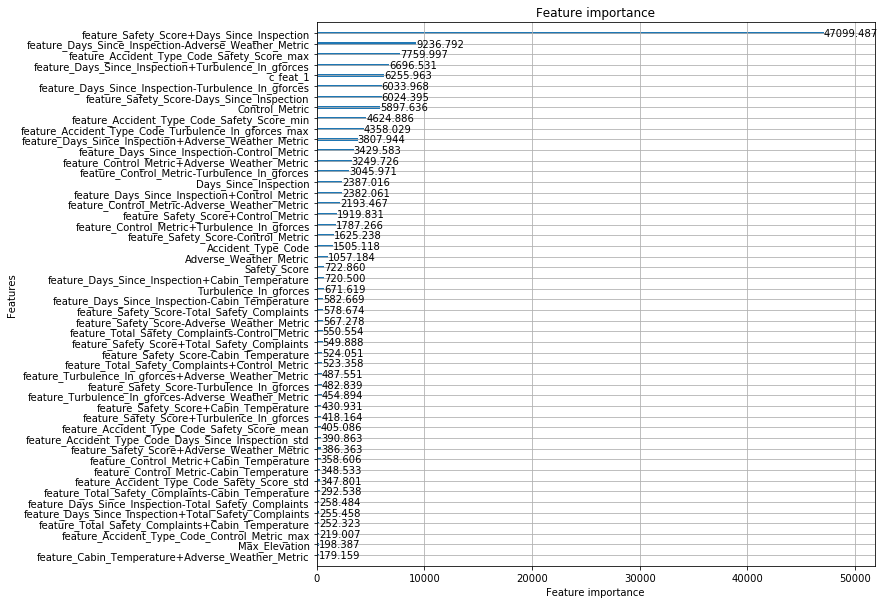

In [80]:
x = lightgbm.plot_importance(lgbm_test, importance_type='gain', max_num_features=50,figsize = (10,10))

In [81]:
temp = pd.DataFrame()
temp_test = pd.DataFrame()
for i in important_features:
    temp[i] = df_feat_1[i]
    temp_test[i] = df_test_feat_1[i]

In [82]:
temp.head()

,feature_Safety_Score+Days_Since_Inspection,feature_Days_Since_Inspection-Adverse_Weather_Metric,feature_Accident_Type_Code_Safety_Score_max,feature_Days_Since_Inspection+Turbulence_In_gforces,c_feat_1,feature_Days_Since_Inspection-Turbulence_In_gforces,feature_Safety_Score-Days_Since_Inspection,Control_Metric,feature_Accident_Type_Code_Safety_Score_min,feature_Accident_Type_Code_Turbulence_In_gforces_max,feature_Days_Since_Inspection+Adverse_Weather_Metric,feature_Days_Since_Inspection-Control_Metric,feature_Control_Metric+Adverse_Weather_Metric,feature_Control_Metric-Turbulence_In_gforces,Days_Since_Inspection,feature_Days_Since_Inspection+Control_Metric,feature_Control_Metric-Adverse_Weather_Metric,feature_Safety_Score+Control_Metric,feature_Control_Metric+Turbulence_In_gforces,feature_Safety_Score-Control_Metric,Accident_Type_Code,Adverse_Weather_Metric,Safety_Score,feature_Days_Since_Inspection+Cabin_Temperature,Turbulence_In_gforces,feature_Days_Since_Inspection-Cabin_Temperature,feature_Safety_Score-Total_Safety_Complaints,feature_Safety_Score-Adverse_Weather_Metric,feature_Total_Safety_Complaints-Control_Metric,feature_Safety_Score+Total_Safety_Complaints,feature_Safety_Score-Cabin_Temperature,feature_Total_Safety_Complaints+Control_Metric,feature_Turbulence_In_gforces+Adverse_Weather_Metric,feature_Safety_Score-Turbulence_In_gforces,feature_Turbulence_In_gforces-Adverse_Weather_Metric,feature_Safety_Score+Cabin_Temperature,feature_Safety_Score+Turbulence_In_gforces,feature_Accident_Type_Code_Safety_Score_mean,feature_Accident_Type_Code_Days_Since_Inspection_std,feature_Safety_Score+Adverse_Weather_Metric,feature_Control_Metric+Cabin_Temperature,feature_Control_Metric-Cabin_Temperature,feature_Accident_Type_Code_Safety_Score_std,feature_Total_Safety_Complaints-Cabin_Temperature,feature_Days_Since_Inspection-Total_Safety_Complaints,feature_Days_Since_Inspection+Total_Safety_Complaints,feature_Total_Safety_Complaints+Cabin_Temperature,feature_Accident_Type_Code_Control_Metric_max,Max_Elevation,feature_Cabin_Temperature+Adverse_Weather_Metric
0,63.223744,13.575648,95.251142,14.272118,True,13.727882,35.223744,71.285324,0.913242,0.882648,14.424352,-57.285324,71.709676,71.013206,14,85.285324,70.860972,120.509068,71.557441,-22.061579,2,0.424352,49.223744,92.04,0.272118,-64.04,27.223744,48.799392,-49.285324,71.223744,-28.816256,93.285324,0.696470,48.951627,-0.152235,127.263744,49.495862,47.373320,3.296434,49.648096,149.325324,-6.754676,14.234303,-56.04,-8,36,100.04,100.000000,31335.476824,78.464352
1,72.465753,9.647650,95.251142,10.423939,True,9.576061,52.465753,72.288058,0.913242,0.882648,10.352350,-62.288058,72.640408,71.864120,10,82.288058,71.935708,134.753812,72.711997,-9.822305,2,0.352350,62.465753,94.54,0.423939,-74.54,35.465753,62.113403,-45.288058,89.465753,-22.074247,99.288058,0.776289,62.041815,0.071589,147.005753,62.889692,47.373320,3.296434,62.818103,156.828058,-12.251942,14.234303,-57.54,-17,37,111.54,100.000000,26024.711057,84.892350
2,76.059361,12.996636,100.000000,13.322604,True,12.677396,50.059361,66.362808,0.000000,0.804754,13.003364,-53.362808,66.366172,66.040203,13,79.362808,66.359444,129.422168,66.685412,-3.303447,7,0.003364,63.059361,91.86,0.322604,-65.86,47.059361,63.055997,-50.362808,79.059361,-15.800639,82.362808,0.325968,62.736756,0.319240,141.919361,63.381965,53.225977,3.843071,63.062725,145.222808,-12.497192,18.220026,-62.86,-3,29,94.86,99.954421,39269.053927,78.863364
3,59.082192,10.788272,100.000000,11.337029,True,10.662971,37.082192,74.703737,0.000000,0.881926,11.211728,-63.703737,74.915466,74.366708,11,85.703737,74.492009,122.785929,75.040767,-26.621546,3,0.211728,48.082192,92.79,0.337029,-70.79,39.082192,47.870464,-65.703737,57.082192,-33.707808,83.703737,0.548757,47.745163,0.125301,129.872192,48.419221,40.507261,3.605846,48.293920,156.493737,-7.086263,13.781965,-72.79,2,20,90.79,100.000000,42771.499200,82.001728
4,39.484018,12.823117,100.000000,13.541140,True,12.458860,13.484018,47.948952,0.00

In [83]:
for c,i in enumerate(temp.dtypes):
    if i !="float64":
        print(c)
        print(temp.columns[c])

4
c_feat_1
14
Days_Since_Inspection
20
Accident_Type_Code
44
feature_Days_Since_Inspection-Total_Safety_Complaints
45
feature_Days_Since_Inspection+Total_Safety_Complaints


In [84]:
num_col = []
for i in temp.columns:
    if i != "c_feat_1":
        num_col.append(i)

In [85]:
#Feature Generation level 2 features
feature_2 = pd.DataFrame()
feature_test_2 = pd.DataFrame()
cat_col = ["c_feat_1"] #categorical columns for which we want to create features
aggs = ["mean","max","min","std"] #functions we want to apply for the columns

for cat in cat_col:
    for num in num_col:
        for fun in aggs:
            feature_2[f'feature_{cat}_{num}_{fun}'] = temp.groupby(cat)[num].transform(fun)
for cat in cat_col:
    for num in num_col:
        for fun in aggs:
            feature_test_2[f'feature_{cat}_{num}_{fun}'] = temp_test.groupby(cat)[num].transform(fun)
# difference between diff columns
for i in range(len(num_col)):
    for j in range(i+1,len(num_col)):
        feature_2[f'feature_{num_col[i]}-{num_col[j]}'] = temp[num_col[i]] - temp[num_col[j]]
        feature_2[f'feature_{num_col[i]}+{num_col[j]}'] = temp[num_col[i]] + temp[num_col[j]]
        feature_2[f'feature_{num_col[i]}*{num_col[j]}'] = temp[num_col[i]] * temp[num_col[j]]
for i in range(len(num_col)):
    for j in range(i+1,len(num_col)):
        feature_test_2[f'feature_{num_col[i]}-{num_col[j]}'] = temp_test[num_col[i]] - temp_test[num_col[j]]
        feature_test_2[f'feature_{num_col[i]}+{num_col[j]}'] = temp_test[num_col[i]] + temp_test[num_col[j]]
        feature_test_2[f'feature_{num_col[i]}*{num_col[j]}'] = temp_test[num_col[i]] * temp_test[num_col[j]]

In [95]:
# now just for testing lets train on each generated features and lets see which ones perform the best in a split

In [96]:
all_params

{'objective': 'multiclass',
 'metric': 'multi_logloss',
 'num_class': 4,
 'boosting_type': 'gbdt',
 'learning_rate': 0.09662716349720435,
 'max_depth': 29,
 'min_data_in_leaf': 62,
 'num_iterations': 521,
 'num_leaves': 70}

In [181]:
df = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/train.csv")
df_test = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/test.csv")

In [182]:
y = df["Severity"]
df = df.drop("Severity",axis =1)
df = df.drop("Accident_ID",axis = 1)
ID = df_test["Accident_ID"]
df_test = df_test.drop("Accident_ID",axis = 1)

In [183]:
def convert2(x):
    sample = []
    for i in x:
        if i=="Minor_Damage_And_Injuries":
            sample.append(1)
        if i=="Significant_Damage_And_Serious_Injuries":
            sample.append(3)
        if i=="Significant_Damage_And_Fatalities":
            sample.append(2)
        if i=="Highly_Fatal_And_Damaging":
            sample.append(0)
    return sample
def convert(predict):
    out = []
    output = []
    for i in range(len(predict)):
        temp = max(predict[i])
        for j in range(4):
            if temp == predict[i][j]:
                out.append(j)
    for i in out:
        if i==0:
            output.append("Highly_Fatal_And_Damaging")
        if i==1:
            output.append("Minor_Damage_And_Injuries")
        if i==2:
            output.append("Significant_Damage_And_Fatalities")
        if i==3:
            output.append("Significant_Damage_And_Serious_Injuries")
    return output

In [184]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
gbm = lightgbm

In [185]:
cv = StratifiedKFold(4, random_state=42,shuffle = True)
li =[]
for train, test in cv.split(df,y):
    X_train, X_test = df.values[train], df.values[test]
    y_train, y_test = y[train], y[test]
    y_c = convert2(y_train)
    y_c_t = convert2(y_test)
    
    train_d = gbm.Dataset(X_train,label = y_c)
    test_d= gbm.Dataset(X_test,label = y_c_t)
    lgbm = gbm.train(all_params,train_set=train_d,valid_sets=test_d)
    temp = lgbm.predict(X_test)
    li.append(f1_score(y_c_t,convert2(convert(temp)),average = "weighted"))
    temp1 = f1_score(y_c_t,convert2(convert(temp)),average = "weighted")
output = (sum(li)/4)
print(output)

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_logloss: 1.24217
[2]	valid_0's multi_logloss: 1.13872
[3]	valid_0's multi_logloss: 1.05161
[4]	valid_0's multi_logloss: 0.977173
[5]	valid_0's multi_logloss: 0.912457
[6]	valid_0's multi_logloss: 0.855946
[7]	valid_0's multi_logloss: 0.805514
[8]	valid_0's multi_logloss: 0.762244
[9]	valid_0's multi_logloss: 0.722598
[10]	valid_0's multi_logloss: 0.686501
[11]	valid_0's multi_logloss: 0.6533
[12]	valid_0's multi_logloss: 0.622747
[13]	valid_0's multi_logloss: 0.594792
[14]	valid_0's multi_logloss: 0.570156
[15]	valid_0's multi_logloss: 0.547396
[16]	valid_0's multi_logloss: 0.525637
[17]	valid_0's multi_logloss: 0.505398
[18]	valid_0's multi_logloss: 0.485525
[19]	valid_0's multi_logloss: 0.467051
[20]	valid_0's multi_logloss: 0.45042
[21]	valid_0's multi_logloss: 0.434891
[22]	valid_0's multi_logloss: 0.421252
[23]	valid_0's multi_logloss: 0.408288
[24]	valid_0's multi_logloss: 0.395536
[25]	valid_0's multi_logloss: 0.383889
[26]	valid_0's multi_logloss: 0.373508
[

[210]	valid_0's multi_logloss: 0.177778
[211]	valid_0's multi_logloss: 0.177868
[212]	valid_0's multi_logloss: 0.17784
[213]	valid_0's multi_logloss: 0.178276
[214]	valid_0's multi_logloss: 0.178417
[215]	valid_0's multi_logloss: 0.178524
[216]	valid_0's multi_logloss: 0.178692
[217]	valid_0's multi_logloss: 0.178956
[218]	valid_0's multi_logloss: 0.17894
[219]	valid_0's multi_logloss: 0.179117
[220]	valid_0's multi_logloss: 0.17957
[221]	valid_0's multi_logloss: 0.179869
[222]	valid_0's multi_logloss: 0.180096
[223]	valid_0's multi_logloss: 0.180057
[224]	valid_0's multi_logloss: 0.180123
[225]	valid_0's multi_logloss: 0.180364
[226]	valid_0's multi_logloss: 0.180641
[227]	valid_0's multi_logloss: 0.180643
[228]	valid_0's multi_logloss: 0.181011
[229]	valid_0's multi_logloss: 0.181229
[230]	valid_0's multi_logloss: 0.181285
[231]	valid_0's multi_logloss: 0.181856
[232]	valid_0's multi_logloss: 0.18214
[233]	valid_0's multi_logloss: 0.182521
[234]	valid_0's multi_logloss: 0.182666
[235

[417]	valid_0's multi_logloss: 0.240658
[418]	valid_0's multi_logloss: 0.240816
[419]	valid_0's multi_logloss: 0.241009
[420]	valid_0's multi_logloss: 0.241417
[421]	valid_0's multi_logloss: 0.241559
[422]	valid_0's multi_logloss: 0.241869
[423]	valid_0's multi_logloss: 0.241952
[424]	valid_0's multi_logloss: 0.242147
[425]	valid_0's multi_logloss: 0.242586
[426]	valid_0's multi_logloss: 0.24285
[427]	valid_0's multi_logloss: 0.243192
[428]	valid_0's multi_logloss: 0.243327
[429]	valid_0's multi_logloss: 0.243496
[430]	valid_0's multi_logloss: 0.243982
[431]	valid_0's multi_logloss: 0.244368
[432]	valid_0's multi_logloss: 0.244546
[433]	valid_0's multi_logloss: 0.244591
[434]	valid_0's multi_logloss: 0.244839
[435]	valid_0's multi_logloss: 0.245374
[436]	valid_0's multi_logloss: 0.245673
[437]	valid_0's multi_logloss: 0.245979
[438]	valid_0's multi_logloss: 0.246528
[439]	valid_0's multi_logloss: 0.246819
[440]	valid_0's multi_logloss: 0.246878
[441]	valid_0's multi_logloss: 0.247208
[

[117]	valid_0's multi_logloss: 0.140493
[118]	valid_0's multi_logloss: 0.140167
[119]	valid_0's multi_logloss: 0.140152
[120]	valid_0's multi_logloss: 0.139585
[121]	valid_0's multi_logloss: 0.139443
[122]	valid_0's multi_logloss: 0.139001
[123]	valid_0's multi_logloss: 0.138542
[124]	valid_0's multi_logloss: 0.138278
[125]	valid_0's multi_logloss: 0.138462
[126]	valid_0's multi_logloss: 0.138457
[127]	valid_0's multi_logloss: 0.138261
[128]	valid_0's multi_logloss: 0.138232
[129]	valid_0's multi_logloss: 0.137894
[130]	valid_0's multi_logloss: 0.137677
[131]	valid_0's multi_logloss: 0.137689
[132]	valid_0's multi_logloss: 0.137521
[133]	valid_0's multi_logloss: 0.137543
[134]	valid_0's multi_logloss: 0.137682
[135]	valid_0's multi_logloss: 0.137257
[136]	valid_0's multi_logloss: 0.137393
[137]	valid_0's multi_logloss: 0.137036
[138]	valid_0's multi_logloss: 0.137012
[139]	valid_0's multi_logloss: 0.136833
[140]	valid_0's multi_logloss: 0.136687
[141]	valid_0's multi_logloss: 0.136659


[325]	valid_0's multi_logloss: 0.160285
[326]	valid_0's multi_logloss: 0.160202
[327]	valid_0's multi_logloss: 0.160379
[328]	valid_0's multi_logloss: 0.160361
[329]	valid_0's multi_logloss: 0.1605
[330]	valid_0's multi_logloss: 0.160594
[331]	valid_0's multi_logloss: 0.160788
[332]	valid_0's multi_logloss: 0.161371
[333]	valid_0's multi_logloss: 0.161791
[334]	valid_0's multi_logloss: 0.162231
[335]	valid_0's multi_logloss: 0.162692
[336]	valid_0's multi_logloss: 0.162888
[337]	valid_0's multi_logloss: 0.163153
[338]	valid_0's multi_logloss: 0.163424
[339]	valid_0's multi_logloss: 0.163647
[340]	valid_0's multi_logloss: 0.163647
[341]	valid_0's multi_logloss: 0.163976
[342]	valid_0's multi_logloss: 0.164108
[343]	valid_0's multi_logloss: 0.164486
[344]	valid_0's multi_logloss: 0.164866
[345]	valid_0's multi_logloss: 0.165201
[346]	valid_0's multi_logloss: 0.165239
[347]	valid_0's multi_logloss: 0.165532
[348]	valid_0's multi_logloss: 0.165641
[349]	valid_0's multi_logloss: 0.165837
[3

[23]	valid_0's multi_logloss: 0.380388
[24]	valid_0's multi_logloss: 0.365868
[25]	valid_0's multi_logloss: 0.352451
[26]	valid_0's multi_logloss: 0.339827
[27]	valid_0's multi_logloss: 0.328307
[28]	valid_0's multi_logloss: 0.317055
[29]	valid_0's multi_logloss: 0.308173
[30]	valid_0's multi_logloss: 0.299562
[31]	valid_0's multi_logloss: 0.291051
[32]	valid_0's multi_logloss: 0.283569
[33]	valid_0's multi_logloss: 0.275449
[34]	valid_0's multi_logloss: 0.268613
[35]	valid_0's multi_logloss: 0.26146
[36]	valid_0's multi_logloss: 0.255363
[37]	valid_0's multi_logloss: 0.24904
[38]	valid_0's multi_logloss: 0.243145
[39]	valid_0's multi_logloss: 0.238123
[40]	valid_0's multi_logloss: 0.232858
[41]	valid_0's multi_logloss: 0.228058
[42]	valid_0's multi_logloss: 0.222977
[43]	valid_0's multi_logloss: 0.218785
[44]	valid_0's multi_logloss: 0.215982
[45]	valid_0's multi_logloss: 0.211656
[46]	valid_0's multi_logloss: 0.207408
[47]	valid_0's multi_logloss: 0.2043
[48]	valid_0's multi_logloss:

[240]	valid_0's multi_logloss: 0.129186
[241]	valid_0's multi_logloss: 0.129383
[242]	valid_0's multi_logloss: 0.129799
[243]	valid_0's multi_logloss: 0.130172
[244]	valid_0's multi_logloss: 0.130333
[245]	valid_0's multi_logloss: 0.13064
[246]	valid_0's multi_logloss: 0.130841
[247]	valid_0's multi_logloss: 0.131011
[248]	valid_0's multi_logloss: 0.131265
[249]	valid_0's multi_logloss: 0.131277
[250]	valid_0's multi_logloss: 0.131569
[251]	valid_0's multi_logloss: 0.131891
[252]	valid_0's multi_logloss: 0.131929
[253]	valid_0's multi_logloss: 0.13223
[254]	valid_0's multi_logloss: 0.13234
[255]	valid_0's multi_logloss: 0.132527
[256]	valid_0's multi_logloss: 0.132949
[257]	valid_0's multi_logloss: 0.133164
[258]	valid_0's multi_logloss: 0.133502
[259]	valid_0's multi_logloss: 0.133524
[260]	valid_0's multi_logloss: 0.133579
[261]	valid_0's multi_logloss: 0.133717
[262]	valid_0's multi_logloss: 0.134039
[263]	valid_0's multi_logloss: 0.134205
[264]	valid_0's multi_logloss: 0.134416
[26

[448]	valid_0's multi_logloss: 0.177127
[449]	valid_0's multi_logloss: 0.177453
[450]	valid_0's multi_logloss: 0.177928
[451]	valid_0's multi_logloss: 0.178061
[452]	valid_0's multi_logloss: 0.178185
[453]	valid_0's multi_logloss: 0.178492
[454]	valid_0's multi_logloss: 0.178641
[455]	valid_0's multi_logloss: 0.178954
[456]	valid_0's multi_logloss: 0.179101
[457]	valid_0's multi_logloss: 0.179225
[458]	valid_0's multi_logloss: 0.179407
[459]	valid_0's multi_logloss: 0.179621
[460]	valid_0's multi_logloss: 0.179701
[461]	valid_0's multi_logloss: 0.179909
[462]	valid_0's multi_logloss: 0.180165
[463]	valid_0's multi_logloss: 0.180217
[464]	valid_0's multi_logloss: 0.18046
[465]	valid_0's multi_logloss: 0.180624
[466]	valid_0's multi_logloss: 0.180573
[467]	valid_0's multi_logloss: 0.180679
[468]	valid_0's multi_logloss: 0.180715
[469]	valid_0's multi_logloss: 0.180592
[470]	valid_0's multi_logloss: 0.180693
[471]	valid_0's multi_logloss: 0.180868
[472]	valid_0's multi_logloss: 0.181204
[

[141]	valid_0's multi_logloss: 0.167463
[142]	valid_0's multi_logloss: 0.167341
[143]	valid_0's multi_logloss: 0.167344
[144]	valid_0's multi_logloss: 0.166948
[145]	valid_0's multi_logloss: 0.167121
[146]	valid_0's multi_logloss: 0.167191
[147]	valid_0's multi_logloss: 0.1673
[148]	valid_0's multi_logloss: 0.167276
[149]	valid_0's multi_logloss: 0.167826
[150]	valid_0's multi_logloss: 0.168113
[151]	valid_0's multi_logloss: 0.167881
[152]	valid_0's multi_logloss: 0.167982
[153]	valid_0's multi_logloss: 0.167843
[154]	valid_0's multi_logloss: 0.167878
[155]	valid_0's multi_logloss: 0.167917
[156]	valid_0's multi_logloss: 0.167993
[157]	valid_0's multi_logloss: 0.167638
[158]	valid_0's multi_logloss: 0.167425
[159]	valid_0's multi_logloss: 0.167721
[160]	valid_0's multi_logloss: 0.167552
[161]	valid_0's multi_logloss: 0.167903
[162]	valid_0's multi_logloss: 0.16823
[163]	valid_0's multi_logloss: 0.168521
[164]	valid_0's multi_logloss: 0.168848
[165]	valid_0's multi_logloss: 0.169071
[16

[348]	valid_0's multi_logloss: 0.227197
[349]	valid_0's multi_logloss: 0.227727
[350]	valid_0's multi_logloss: 0.22825
[351]	valid_0's multi_logloss: 0.228509
[352]	valid_0's multi_logloss: 0.228909
[353]	valid_0's multi_logloss: 0.229413
[354]	valid_0's multi_logloss: 0.229814
[355]	valid_0's multi_logloss: 0.23024
[356]	valid_0's multi_logloss: 0.230598
[357]	valid_0's multi_logloss: 0.230885
[358]	valid_0's multi_logloss: 0.231277
[359]	valid_0's multi_logloss: 0.231733
[360]	valid_0's multi_logloss: 0.232133
[361]	valid_0's multi_logloss: 0.232641
[362]	valid_0's multi_logloss: 0.233111
[363]	valid_0's multi_logloss: 0.233468
[364]	valid_0's multi_logloss: 0.233808
[365]	valid_0's multi_logloss: 0.234146
[366]	valid_0's multi_logloss: 0.234423
[367]	valid_0's multi_logloss: 0.234867
[368]	valid_0's multi_logloss: 0.234859
[369]	valid_0's multi_logloss: 0.235414
[370]	valid_0's multi_logloss: 0.235691
[371]	valid_0's multi_logloss: 0.236239
[372]	valid_0's multi_logloss: 0.23657
[37

In [ ]:
# now with only features 1

In [147]:
cv = StratifiedKFold(4, random_state=42,shuffle = True)
li =[]
for train, test in cv.split(feat_1_only,y):
    X_train, X_test = feat_1_only.values[train], feat_1_only.values[test]
    y_train, y_test = y[train], y[test]
    y_c = convert2(y_train)
    y_c_t = convert2(y_test)

    train_d = gbm.Dataset(X_train,label = y_c)
    test_d= gbm.Dataset(X_test,label = y_c_t)
    lgbm = gbm.train(temp_param,train_set=train_d,valid_sets=test_d)
    temp = lgbm.predict(X_test)
    li.append(f1_score(y_c_t,convert2(convert(temp)),average = "weighted"))
    temp1 = f1_score(y_c_t,convert2(convert(temp)),average = "weighted")
output = (sum(li)/4)
print(output)

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_logloss: 1.23094
[2]	valid_0's multi_logloss: 1.12101
[3]	valid_0's multi_logloss: 1.02965
[4]	valid_0's multi_logloss: 0.948832
[5]	valid_0's multi_logloss: 0.879652
[6]	valid_0's multi_logloss: 0.819076
[7]	valid_0's multi_logloss: 0.764298
[8]	valid_0's multi_logloss: 0.715495
[9]	valid_0's multi_logloss: 0.673161
[10]	valid_0's multi_logloss: 0.63396
[11]	valid_0's multi_logloss: 0.599004
[12]	valid_0's multi_logloss: 0.566837
[13]	valid_0's multi_logloss: 0.538236
[14]	valid_0's multi_logloss: 0.51201
[15]	valid_0's multi_logloss: 0.487946
[16]	valid_0's multi_logloss: 0.467398
[17]	valid_0's multi_logloss: 0.447473
[18]	valid_0's multi_logloss: 0.428248
[19]	valid_0's multi_logloss: 0.411479
[20]	valid_0's multi_logloss: 0.396136
[21]	valid_0's multi_logloss: 0.381662
[22]	valid_0's multi_logloss: 0.367734
[23]	valid_0's multi_logloss: 0.355308
[24]	valid_0's multi_logloss: 0.344692
[25]	valid_0's multi_logloss: 0.33458
[26]	valid_0's multi_logloss: 0.324705
[

In [152]:
# now with only feat_2


In [162]:
cv = StratifiedKFold(4, random_state=42,shuffle = True)
li =[]
for train, test in cv.split(feature_2,y):
    X_train, X_test = feature_2.values[train], feature_2.values[test]
    y_train, y_test = y[train], y[test]
    y_c = convert2(y_train)
    y_c_t = convert2(y_test)
    
    train_d = gbm.Dataset(X_train,label = y_c)
    test_d= gbm.Dataset(X_test,label = y_c_t)
    lgbm = gbm.train(all_params,train_set=train_d,valid_sets=test_d)
    temp = lgbm.predict(X_test)
    li.append(f1_score(y_c_t,convert2(convert(temp)),average = "weighted"))
    temp1 = f1_score(y_c_t,convert2(convert(temp)),average = "weighted")
output = (sum(li)/4)
print(output)

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_logloss: 1.21216
[2]	valid_0's multi_logloss: 1.0884
[3]	valid_0's multi_logloss: 0.985381
[4]	valid_0's multi_logloss: 0.897703
[5]	valid_0's multi_logloss: 0.821506
[6]	valid_0's multi_logloss: 0.755191
[7]	valid_0's multi_logloss: 0.69619
[8]	valid_0's multi_logloss: 0.644445
[9]	valid_0's multi_logloss: 0.598542
[10]	valid_0's multi_logloss: 0.557233
[11]	valid_0's multi_logloss: 0.520194
[12]	valid_0's multi_logloss: 0.487197
[13]	valid_0's multi_logloss: 0.45695
[14]	valid_0's multi_logloss: 0.42977
[15]	valid_0's multi_logloss: 0.405482
[16]	valid_0's multi_logloss: 0.383909
[17]	valid_0's multi_logloss: 0.364718
[18]	valid_0's multi_logloss: 0.346771
[19]	valid_0's multi_logloss: 0.330304
[20]	valid_0's multi_logloss: 0.315862
[21]	valid_0's multi_logloss: 0.302706
[22]	valid_0's multi_logloss: 0.290595
[23]	valid_0's multi_logloss: 0.279528
[24]	valid_0's multi_logloss: 0.269239
[25]	valid_0's multi_logloss: 0.260116
[26]	valid_0's multi_logloss: 0.251735
[

[210]	valid_0's multi_logloss: 0.228362
[211]	valid_0's multi_logloss: 0.229362
[212]	valid_0's multi_logloss: 0.230045
[213]	valid_0's multi_logloss: 0.230887
[214]	valid_0's multi_logloss: 0.231328
[215]	valid_0's multi_logloss: 0.232058
[216]	valid_0's multi_logloss: 0.232755
[217]	valid_0's multi_logloss: 0.233373
[218]	valid_0's multi_logloss: 0.234235
[219]	valid_0's multi_logloss: 0.234773
[220]	valid_0's multi_logloss: 0.23509
[221]	valid_0's multi_logloss: 0.23579
[222]	valid_0's multi_logloss: 0.23647
[223]	valid_0's multi_logloss: 0.237121
[224]	valid_0's multi_logloss: 0.23781
[225]	valid_0's multi_logloss: 0.238256
[226]	valid_0's multi_logloss: 0.239199
[227]	valid_0's multi_logloss: 0.239548
[228]	valid_0's multi_logloss: 0.240062
[229]	valid_0's multi_logloss: 0.240562
[230]	valid_0's multi_logloss: 0.240734
[231]	valid_0's multi_logloss: 0.241602
[232]	valid_0's multi_logloss: 0.242163
[233]	valid_0's multi_logloss: 0.242638
[234]	valid_0's multi_logloss: 0.243285
[235

[417]	valid_0's multi_logloss: 0.281726
[418]	valid_0's multi_logloss: 0.281702
[419]	valid_0's multi_logloss: 0.2818
[420]	valid_0's multi_logloss: 0.281807
[421]	valid_0's multi_logloss: 0.281778
[422]	valid_0's multi_logloss: 0.281987
[423]	valid_0's multi_logloss: 0.282039
[424]	valid_0's multi_logloss: 0.28208
[425]	valid_0's multi_logloss: 0.282157
[426]	valid_0's multi_logloss: 0.282246
[427]	valid_0's multi_logloss: 0.282287
[428]	valid_0's multi_logloss: 0.282339
[429]	valid_0's multi_logloss: 0.282319
[430]	valid_0's multi_logloss: 0.282491
[431]	valid_0's multi_logloss: 0.282596
[432]	valid_0's multi_logloss: 0.282588
[433]	valid_0's multi_logloss: 0.282674
[434]	valid_0's multi_logloss: 0.282787
[435]	valid_0's multi_logloss: 0.282752
[436]	valid_0's multi_logloss: 0.28278
[437]	valid_0's multi_logloss: 0.282732
[438]	valid_0's multi_logloss: 0.282762
[439]	valid_0's multi_logloss: 0.282832
[440]	valid_0's multi_logloss: 0.282875
[441]	valid_0's multi_logloss: 0.282982
[442

[105]	valid_0's multi_logloss: 0.131913
[106]	valid_0's multi_logloss: 0.132377
[107]	valid_0's multi_logloss: 0.132875
[108]	valid_0's multi_logloss: 0.133091
[109]	valid_0's multi_logloss: 0.133394
[110]	valid_0's multi_logloss: 0.133883
[111]	valid_0's multi_logloss: 0.134251
[112]	valid_0's multi_logloss: 0.134785
[113]	valid_0's multi_logloss: 0.135406
[114]	valid_0's multi_logloss: 0.135683
[115]	valid_0's multi_logloss: 0.136178
[116]	valid_0's multi_logloss: 0.136558
[117]	valid_0's multi_logloss: 0.137037
[118]	valid_0's multi_logloss: 0.137372
[119]	valid_0's multi_logloss: 0.137711
[120]	valid_0's multi_logloss: 0.138192
[121]	valid_0's multi_logloss: 0.138725
[122]	valid_0's multi_logloss: 0.139017
[123]	valid_0's multi_logloss: 0.139418
[124]	valid_0's multi_logloss: 0.139741
[125]	valid_0's multi_logloss: 0.14009
[126]	valid_0's multi_logloss: 0.140348
[127]	valid_0's multi_logloss: 0.140524
[128]	valid_0's multi_logloss: 0.140788
[129]	valid_0's multi_logloss: 0.140932
[

[311]	valid_0's multi_logloss: 0.221341
[312]	valid_0's multi_logloss: 0.221666
[313]	valid_0's multi_logloss: 0.221823
[314]	valid_0's multi_logloss: 0.221868
[315]	valid_0's multi_logloss: 0.221865
[316]	valid_0's multi_logloss: 0.221853
[317]	valid_0's multi_logloss: 0.221977
[318]	valid_0's multi_logloss: 0.222008
[319]	valid_0's multi_logloss: 0.222229
[320]	valid_0's multi_logloss: 0.222383
[321]	valid_0's multi_logloss: 0.222604
[322]	valid_0's multi_logloss: 0.222671
[323]	valid_0's multi_logloss: 0.222845
[324]	valid_0's multi_logloss: 0.223023
[325]	valid_0's multi_logloss: 0.223179
[326]	valid_0's multi_logloss: 0.223286
[327]	valid_0's multi_logloss: 0.223376
[328]	valid_0's multi_logloss: 0.223589
[329]	valid_0's multi_logloss: 0.223507
[330]	valid_0's multi_logloss: 0.223598
[331]	valid_0's multi_logloss: 0.22365
[332]	valid_0's multi_logloss: 0.223759
[333]	valid_0's multi_logloss: 0.223894
[334]	valid_0's multi_logloss: 0.224097
[335]	valid_0's multi_logloss: 0.224208
[

[204]	valid_0's multi_logloss: 0.155129
[205]	valid_0's multi_logloss: 0.155832
[206]	valid_0's multi_logloss: 0.156674
[207]	valid_0's multi_logloss: 0.157074
[208]	valid_0's multi_logloss: 0.1575
[209]	valid_0's multi_logloss: 0.158062
[210]	valid_0's multi_logloss: 0.158278
[211]	valid_0's multi_logloss: 0.158647
[212]	valid_0's multi_logloss: 0.15907
[213]	valid_0's multi_logloss: 0.159732
[214]	valid_0's multi_logloss: 0.160288
[215]	valid_0's multi_logloss: 0.16059
[216]	valid_0's multi_logloss: 0.161316
[217]	valid_0's multi_logloss: 0.161962
[218]	valid_0's multi_logloss: 0.16253
[219]	valid_0's multi_logloss: 0.163111
[220]	valid_0's multi_logloss: 0.163574
[221]	valid_0's multi_logloss: 0.164167
[222]	valid_0's multi_logloss: 0.164617
[223]	valid_0's multi_logloss: 0.165107
[224]	valid_0's multi_logloss: 0.165568
[225]	valid_0's multi_logloss: 0.166108
[226]	valid_0's multi_logloss: 0.166375
[227]	valid_0's multi_logloss: 0.16687
[228]	valid_0's multi_logloss: 0.167205
[229]	

[410]	valid_0's multi_logloss: 0.202385
[411]	valid_0's multi_logloss: 0.20235
[412]	valid_0's multi_logloss: 0.202461
[413]	valid_0's multi_logloss: 0.202619
[414]	valid_0's multi_logloss: 0.202717
[415]	valid_0's multi_logloss: 0.202693
[416]	valid_0's multi_logloss: 0.202788
[417]	valid_0's multi_logloss: 0.202853
[418]	valid_0's multi_logloss: 0.202934
[419]	valid_0's multi_logloss: 0.20298
[420]	valid_0's multi_logloss: 0.202973
[421]	valid_0's multi_logloss: 0.202994
[422]	valid_0's multi_logloss: 0.202961
[423]	valid_0's multi_logloss: 0.20302
[424]	valid_0's multi_logloss: 0.203069
[425]	valid_0's multi_logloss: 0.203218
[426]	valid_0's multi_logloss: 0.20332
[427]	valid_0's multi_logloss: 0.203246
[428]	valid_0's multi_logloss: 0.203304
[429]	valid_0's multi_logloss: 0.203467
[430]	valid_0's multi_logloss: 0.203451
[431]	valid_0's multi_logloss: 0.203514
[432]	valid_0's multi_logloss: 0.203585
[433]	valid_0's multi_logloss: 0.203659
[434]	valid_0's multi_logloss: 0.20368
[435]

[98]	valid_0's multi_logloss: 0.153912
[99]	valid_0's multi_logloss: 0.154428
[100]	valid_0's multi_logloss: 0.15528
[101]	valid_0's multi_logloss: 0.155894
[102]	valid_0's multi_logloss: 0.156486
[103]	valid_0's multi_logloss: 0.156746
[104]	valid_0's multi_logloss: 0.157196
[105]	valid_0's multi_logloss: 0.157714
[106]	valid_0's multi_logloss: 0.157652
[107]	valid_0's multi_logloss: 0.158001
[108]	valid_0's multi_logloss: 0.158653
[109]	valid_0's multi_logloss: 0.159173
[110]	valid_0's multi_logloss: 0.159895
[111]	valid_0's multi_logloss: 0.160402
[112]	valid_0's multi_logloss: 0.161035
[113]	valid_0's multi_logloss: 0.161733
[114]	valid_0's multi_logloss: 0.162711
[115]	valid_0's multi_logloss: 0.163335
[116]	valid_0's multi_logloss: 0.164141
[117]	valid_0's multi_logloss: 0.164732
[118]	valid_0's multi_logloss: 0.165551
[119]	valid_0's multi_logloss: 0.166276
[120]	valid_0's multi_logloss: 0.166898
[121]	valid_0's multi_logloss: 0.167516
[122]	valid_0's multi_logloss: 0.168294
[12

[304]	valid_0's multi_logloss: 0.282758
[305]	valid_0's multi_logloss: 0.282953
[306]	valid_0's multi_logloss: 0.283325
[307]	valid_0's multi_logloss: 0.283619
[308]	valid_0's multi_logloss: 0.283733
[309]	valid_0's multi_logloss: 0.284132
[310]	valid_0's multi_logloss: 0.284265
[311]	valid_0's multi_logloss: 0.284632
[312]	valid_0's multi_logloss: 0.284799
[313]	valid_0's multi_logloss: 0.284923
[314]	valid_0's multi_logloss: 0.285166
[315]	valid_0's multi_logloss: 0.285398
[316]	valid_0's multi_logloss: 0.285655
[317]	valid_0's multi_logloss: 0.285749
[318]	valid_0's multi_logloss: 0.285752
[319]	valid_0's multi_logloss: 0.285974
[320]	valid_0's multi_logloss: 0.286045
[321]	valid_0's multi_logloss: 0.286117
[322]	valid_0's multi_logloss: 0.286541
[323]	valid_0's multi_logloss: 0.286712
[324]	valid_0's multi_logloss: 0.287036
[325]	valid_0's multi_logloss: 0.287119
[326]	valid_0's multi_logloss: 0.287177
[327]	valid_0's multi_logloss: 0.287445
[328]	valid_0's multi_logloss: 0.287759


[511]	valid_0's multi_logloss: 0.303669
[512]	valid_0's multi_logloss: 0.303634
[513]	valid_0's multi_logloss: 0.303727
[514]	valid_0's multi_logloss: 0.303791
[515]	valid_0's multi_logloss: 0.30379
[516]	valid_0's multi_logloss: 0.303782
[517]	valid_0's multi_logloss: 0.303752
[518]	valid_0's multi_logloss: 0.303852
[519]	valid_0's multi_logloss: 0.303855
[520]	valid_0's multi_logloss: 0.303937
[521]	valid_0's multi_logloss: 0.304003
0.9592889807162536


In [169]:
imp_feat = lgbm.feature_importance(importance_type = "gain") # these are the feature importances
feat_name = feature_2.columns # these are the feature names

# lets make a dictionary

feat_dict = {}
for c,i in enumerate(imp_feat):
    feat_dict[i] = feat_name[c]
z = sorted(feat_dict.keys(),reverse = True)
count = 0
important_features = [] #this contains all the important features names in a list
for i in z:
    if count<50: # number of features to extract
        important_features.append(feat_dict[i])
    else:
        break
    count =count+1


In [170]:
important_features

['feature_feature_Safety_Score+Days_Since_Inspection+feature_Days_Since_Inspection+Control_Metric',
 'feature_feature_Days_Since_Inspection+Turbulence_In_gforces*feature_Safety_Score-Adverse_Weather_Metric',
 'feature_feature_Days_Since_Inspection+Turbulence_In_gforces*feature_Safety_Score+Turbulence_In_gforces',
 'feature_Days_Since_Inspection*feature_Safety_Score-Turbulence_In_gforces',
 'feature_feature_Accident_Type_Code_Safety_Score_max+Adverse_Weather_Metric',
 'feature_feature_Days_Since_Inspection-Turbulence_In_gforces*feature_Safety_Score+Turbulence_In_gforces',
 'feature_Control_Metric-feature_Accident_Type_Code_Turbulence_In_gforces_max',
 'feature_feature_Days_Since_Inspection+Turbulence_In_gforces*feature_Safety_Score-Turbulence_In_gforces',
 'feature_feature_Safety_Score+Days_Since_Inspection+Days_Since_Inspection',
 'feature_feature_Safety_Score+Days_Since_Inspection+feature_Days_Since_Inspection-Control_Metric',
 'feature_Days_Since_Inspection*feature_Safety_Score+Turbu

In [165]:
feature_2.head()

feature_c_feat_1_feature_Safety_Score+Days_Since_Inspection_mean  \
0                                          62.151034                  
1                                          62.151034                  
2                                          62.151034                  
3                                          62.151034                  
4                                          62.151034                  

   feature_c_feat_1_feature_Safety_Score+Days_Since_Inspection_max  \
0                                              106.0                 
1                                              106.0                 
2                                              106.0                 
3                                              106.0                 
4                                              106.0                 

   feature_c_feat_1_feature_Safety_Score+Days_Since_Inspection_min  \
0                                          21.141553                 
1                                          21.141553                 
2                                          21.141553                 
3                                          21.141553                 
4                                          21.141553                 

   feature_c_feat_1_feature_Safety_Score+Days_Since_Inspection_std  \
0                                          13.580317                 
1                                          13.580317                 
2                                          13.580317                 
3                                          13.580317                 
4                                          13.580317                 

   feature_c_feat_1_feature_Days_Since_Inspection-Adverse_Weather_Metric_mean  \
0                                          11.422023                            
1                                          11.422023                            
2                                          11.422023                            
3                                          11.422023                            
4                                          11.422023                            

   feature_c_feat_1_feature_Days_Since_Inspection-Adverse_Weather_Metric_max  \
0                                          22.994069                           
1                                          22.994069                           
2                                          22.994069                           
3                                          22.994069                           
4                                          22.994069                           

   feature_c_feat_1_feature_Days_Since_Inspection-Adverse_Weather_Metric_min  \
0                                           0.570465                           
1                                           0.570465                           
2                                           0.570465                           
3                                           0.570465                           
4                                           0.570465                           

   feature_c_feat_1_feature_Days_Since_Inspection-Adverse_Weather_Metric_std  \
0                                           3.495075                           
1                                           3.495075                           
2                                           3.495075                           
3                                           3.495075                           
4                                           3.495075                           

   feature_c_feat_1_feature_Accident_Type_Code_Safety_Score_max_mean  \
0                                          95.310026                   
1                                          95.310026                   
2                                          95.310026                   
3                                          95.310026                   
4                      

In [166]:
feat_dict

{65.99720210798313: 'Column_0',
 0.0: 'Column_3722',
 0.5946040565904696: 'Column_4',
 0.271034250984324: 'Column_22',
 0.1583227883093059: 'Column_41',
 111.57761877315444: 'Column_196',
 1591.3430355429125: 'Column_197',
 2493.129252038025: 'Column_198',
 77.75761220106969: 'Column_199',
 98.91302845505825: 'Column_200',
 494.1464032234366: 'Column_201',
 0.17461787024512887: 'Column_202',
 448.42274461339673: 'Column_203',
 2032.2598156142346: 'Column_204',
 0.1471110223501455: 'Column_205',
 533.8103847220343: 'Column_206',
 636.3557405852195: 'Column_207',
 0.00045829330338165164: 'Column_208',
 1.2404215126589406: 'Column_210',
 2.837000543667307: 'Column_211',
 2.6875749313849155: 'Column_212',
 2.2685673769838104: 'Column_213',
 34.33884050774164: 'Column_214',
 6.048106011339769: 'Column_215',
 1820.6607857757726: 'Column_216',
 49.85487058925082: 'Column_217',
 0.9451226189370914: 'Column_218',
 90.1845784242049: 'Column_219',
 3.50068998336792: 'Column_220',
 345.76686248131

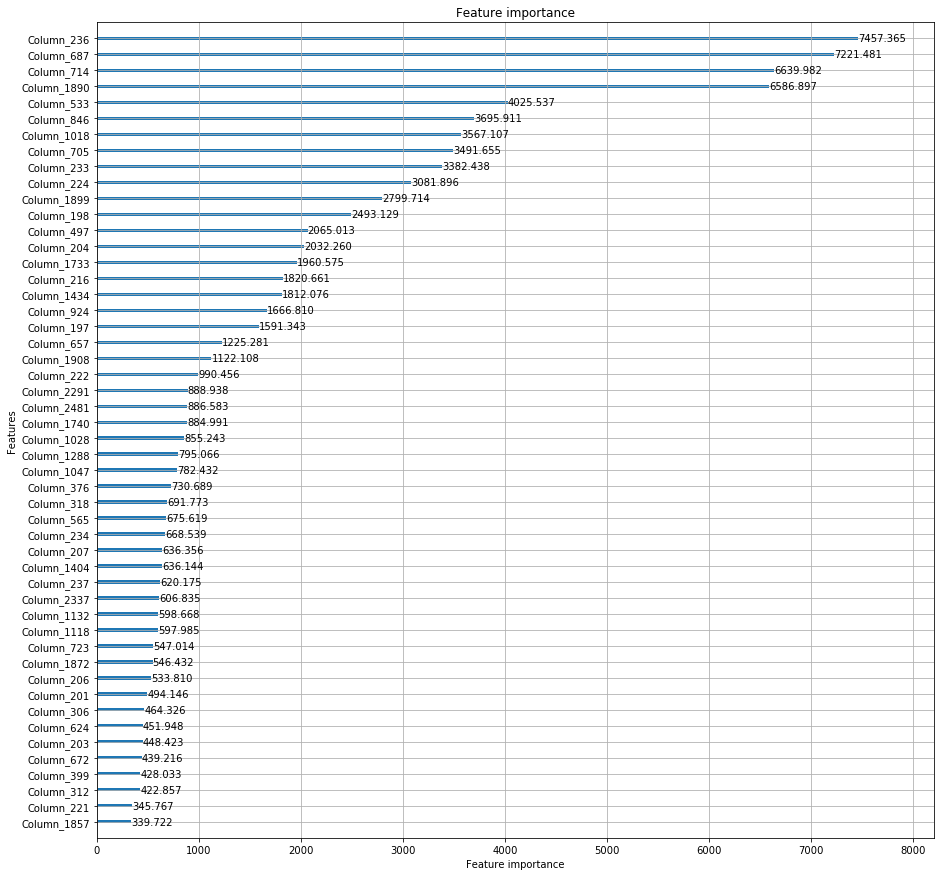

In [172]:
lightgbm.plot_importance(lgbm, importance_type='gain', max_num_features=50,figsize = (15,15))

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [177]:
type(y)

pandas.core.series.Series

In [86]:
# saving all features
temp_f = pd.concat([feat_1_only,y],axis = 1)
feat_1_only.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_1_only_train.csv",index = False)
feat_1_test_only.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_1_only_test.csv",index = False)

In [87]:
temp_f = pd.concat([df,feat_1_only,y],axis = 1)
temp_f_t = pd.concat([df_test,feat_1_test_only],axis = 1)

In [88]:
temp_f.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_1_train.csv",index = False)
temp_f_t.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_1_test.csv",index = False)

In [89]:
feature_2.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_2_only_train.csv",index = False)
feature_test_2.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_2_only_test.csv",index = False)


In [92]:
temp_f = pd.concat([df,feat_1_only,feature_2,y],axis = 1)
temp_f_t = pd.concat([df_test,feat_1_test_only,feature_test_2],axis = 1)

In [93]:
temp_f.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_2_1_train.csv",index = False)
temp_f_t.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_2_1_test.csv",index = False)


In [176]:
# mean encoding
# this first dummifies the target then creates mean encodings.
def mean_encoding(columns,df,target,df_test): # here columns is the name of the columns to encode and df is the dataframe target is the column name for the target variable
    mean_en = pd.DataFrame()
    mean_en_test = pd.DataFrame()
    temp = pd.DataFrame(df[target])
    n = temp[target].nunique()
    un = temp[target].unique()
    count = 0
    new_target = pd.DataFrame()
    for i in range(n):
        tempx = []
        for j in range(df.shape[0]):
            if un[i] == temp.iloc[j,0]:
                tempx.append(1)
            else:
                tempx.append(0)
        new_target[un[i]] = tempx
    df = df.drop(target,axis = 1)
    temp2 = pd.concat([df,new_target],axis = 1)
    for i in columns:
        for j in range(n):
            temp = temp2.groupby(i)[un[j]].mean()
            mean_en[f"{i}+{un[j]}_mean_encoding"] = temp2[i].map(temp)
            mean_en_test[f"{i}+{un[j]}_mean_encoding"] = df_test[i].map(temp)
            if mean_en[f"{i}+{un[j]}_mean_encoding"].isnull().sum()>0:
                glob_mean = temp2[un[j]].mean()
                mean_en[f"{i}+{un[j]}_mean_encoding"] = mean_en[f"{i}+{un[j]}_mean_encoding"].fillna(glob_mean)
                mean_en_test[f"{i}+{un[j]}_mean_encoding"] = mean_en_test[f"{i}+{un[j]}_mean_encoding"].fillna(glob_mean)
    return mean_en,mean_en_test

In [177]:
columns_encode = ["Violations","Accident_Type_Code","Days_Since_Inspection","Total_Safety_Complaints"]
temp_df = pd.concat([df,y],axis = 1)

x,z = mean_encoding(columns_encode,temp_df,"Severity",df_test)


In [97]:
temp_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Severity
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,Minor_Damage_And_Injuries
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,Minor_Damage_And_Injuries
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,Significant_Damage_And_Fatalities
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,Significant_Damage_And_Serious_Injuries
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,Significant_Damage_And_Fatalities
